In [91]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597) 
  
# data (as pandas dataframes) 
X = productivity_prediction_of_garment_employees.data.features 
y = productivity_prediction_of_garment_employees.data.targets 
  
# metadata 
print(productivity_prediction_of_garment_employees.metadata) 
  
# variable information 
print(productivity_prediction_of_garment_employees.variables) 

{'uci_id': 597, 'name': 'Productivity Prediction of Garment Employees', 'repository_url': 'https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees', 'data_url': 'https://archive.ics.uci.edu/static/public/597/data.csv', 'abstract': 'This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 1197, 'num_features': 14, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['actual_productivity'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51S6D', 'creators': [], 'intro_paper': {'title': 'Mining the productivity data of the garment industry', '

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.concat([X,y], axis =1)

In [94]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


date: date in MM-DD-YYYY

quarter: a portion of the month — month was divided into four quarters

department: associated department with the instance

day: day of the week

team: associated team number with the instance

targeted_productivity: targeted productivity set by the authority for each team for each day

smv: standard minute value — the allocated time for a task

wip: work in progress — includes the number of unfinished items for products

over_time: represents the amount of overtime by each team in minutes

incentive: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action

idle_time: the duration of time when the production was interrupted due to several reasons

idle_men: the number of workers who were idle due to production interruption

no_of_style_change: number of changes in the style of a particular product

no_of_workers: number of workers on each team

actual_productivity: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

## Exploratory Data Analysis (EDA) and Data Visualization

In [95]:
df.shape

(1197, 15)

In [96]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [97]:
df_.shape

(1197, 14)

In [98]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [100]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace =True)

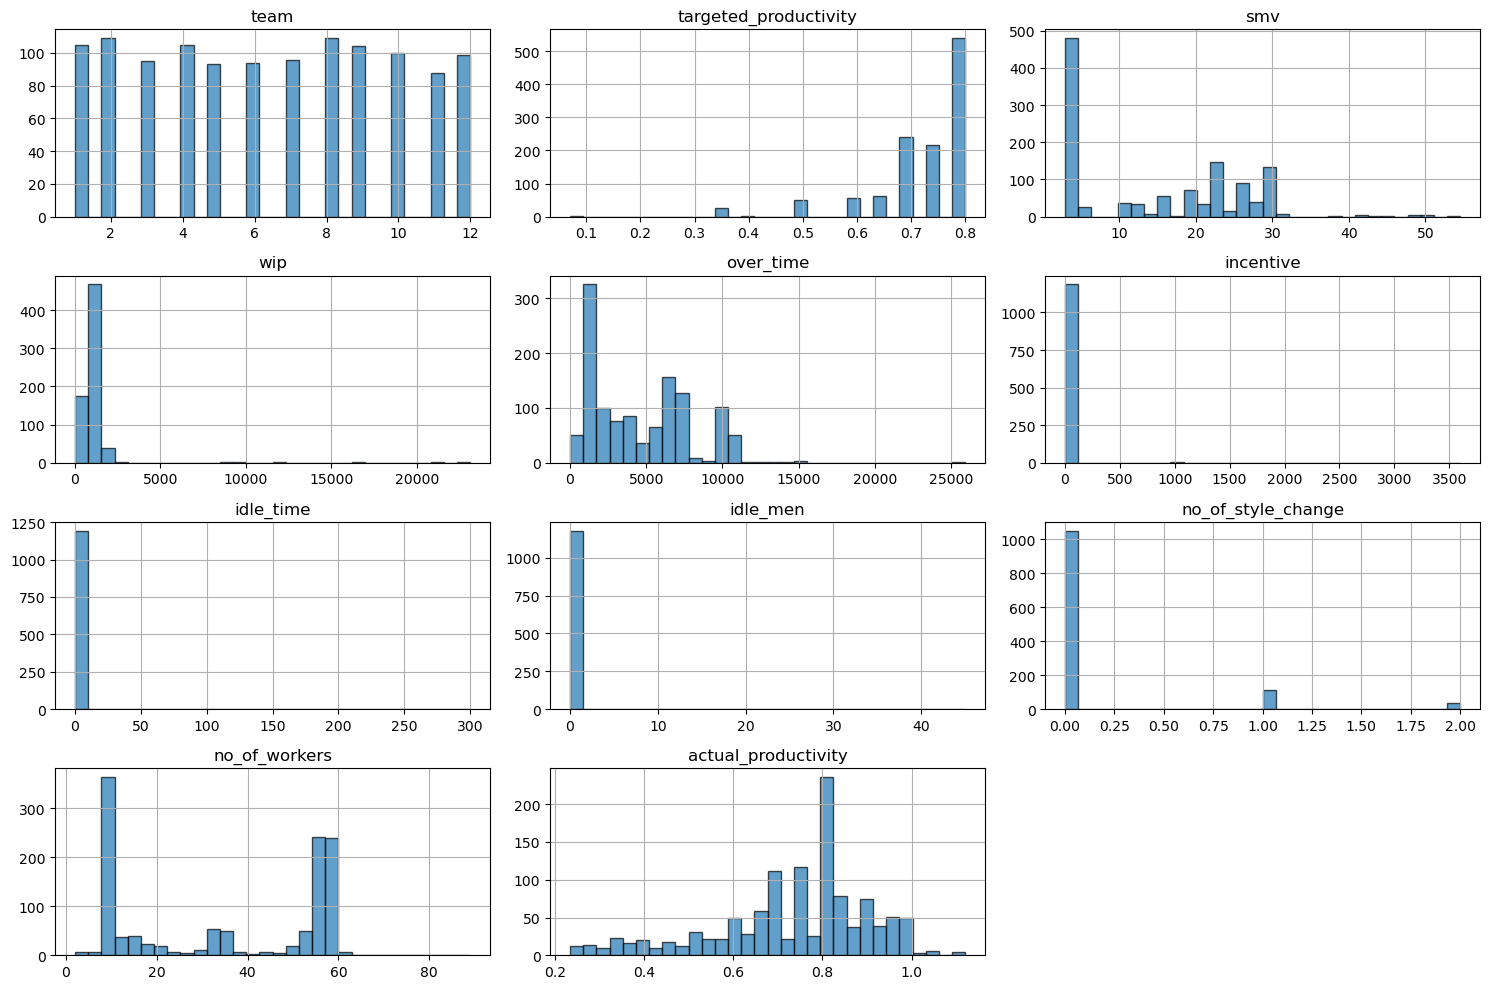

In [101]:
df.hist(figsize=(15, 10), bins=30, edgecolor='k', alpha=0.7)
plt.tight_layout()
plt.show()

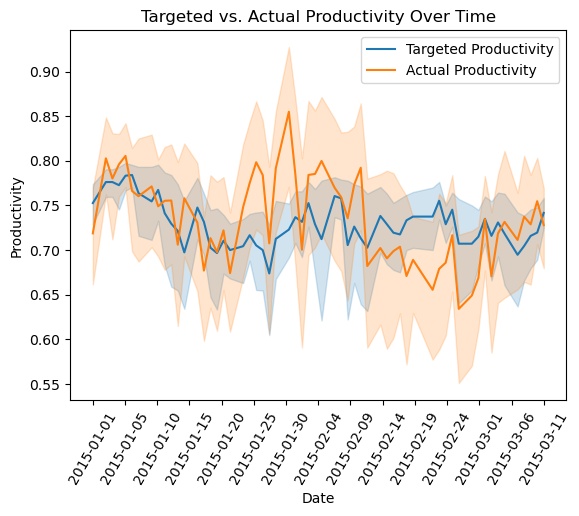

In [102]:
sns.lineplot(data=df, x=df.index, y='targeted_productivity', label='Targeted Productivity')
sns.lineplot(data=df, x=df.index, y='actual_productivity', label='Actual Productivity')

plt.title('Targeted vs. Actual Productivity Over Time')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Productivity')
start_date = df.index.min()
end_date = df.index.max()
date_ticks = pd.date_range(start=start_date, end=end_date, periods=15)
plt.xticks(date_ticks, rotation=60)
plt.legend()
plt.show()

In [103]:
df.groupby('department')['actual_productivity'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
finishing,506.0,0.752951,0.197021,0.235795,0.631606,0.805909,0.906364,1.120437
sweing,691.0,0.722013,0.154784,0.233705,0.661470,0.750608,0.800402,1.100484


In [104]:
df.groupby('department')['targeted_productivity'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
finishing,506.0,0.737352,0.091512,0.35,0.7,0.75,0.8,0.8
sweing,691.0,0.723980,0.102006,0.07,0.7,0.75,0.8,0.8


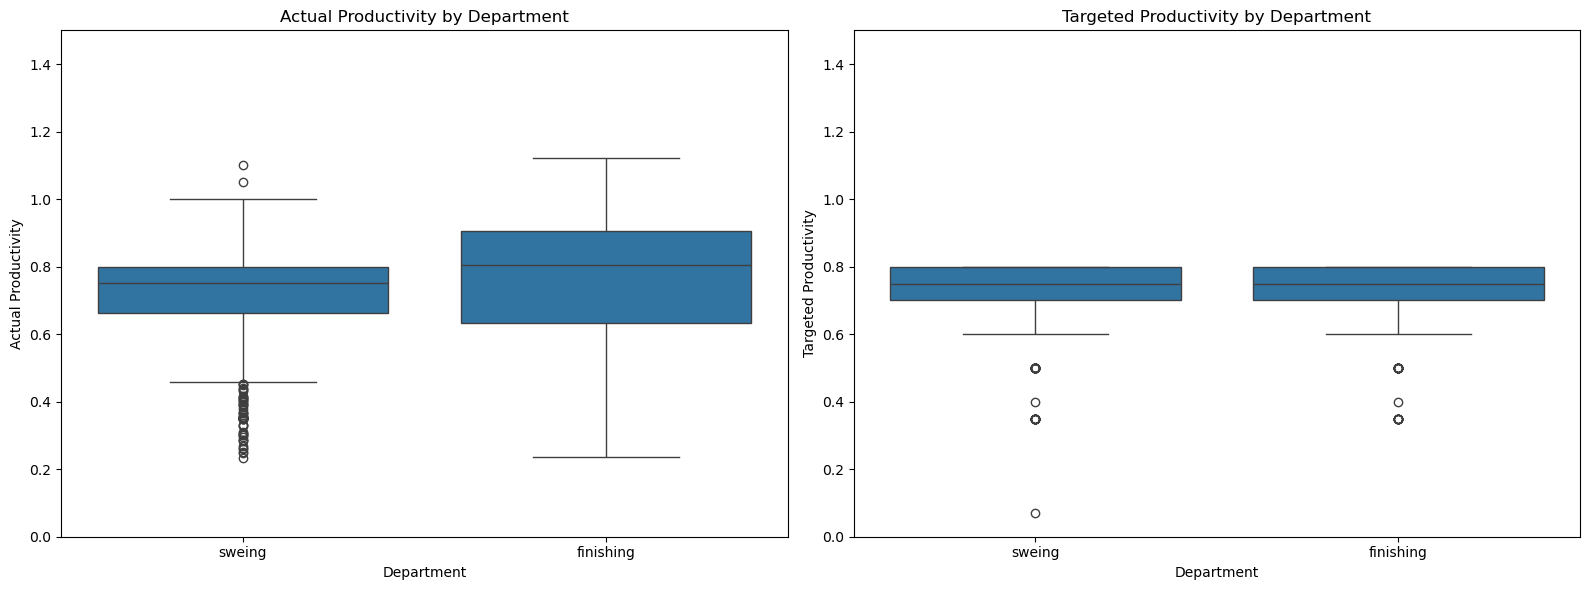

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for actual productivity
sns.boxplot(x='department', y='actual_productivity', data=df, ax=ax1)
ax1.set_title('Actual Productivity by Department')
ax1.set_xlabel('Department')
ax1.set_ylabel('Actual Productivity')
ax1.set_ylim(0, 1.5)

# Plot for targeted productivity
sns.boxplot(x='department', y='targeted_productivity', data=df, ax=ax2)
ax2.set_title('Targeted Productivity by Department')
ax2.set_xlabel('Department')
ax2.set_ylabel('Targeted Productivity')
ax2.set_ylim(0, 1.5)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [120]:
df[df["over_time"] == 0]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-02-09,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
2015-02-10,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
2015-02-10,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
2015-02-10,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
2015-02-10,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
2015-02-11,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
2015-02-11,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
2015-02-11,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
2015-02-12,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484


In [122]:
len(df[df['over_time'] == 0])

31

In [123]:
len(df[df['over_time'] > 0])

1166

It seems the company mostly works overtime.

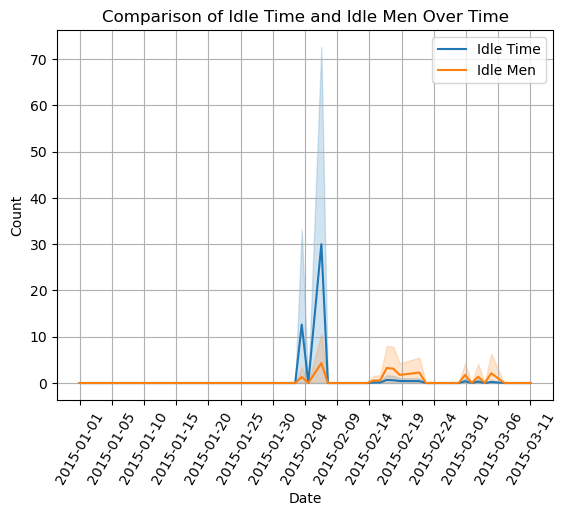

In [106]:
sns.lineplot(data=df, x=df.index, y='idle_time', label='Idle Time')
sns.lineplot(data=df, x=df.index, y='idle_men', label='Idle Men')

plt.title('Comparison of Idle Time and Idle Men Over Time')
plt.xlabel('Date')
plt.xticks(rotation = 60)
plt.ylabel('Count')
start_date = df.index.min()
end_date = df.index.max()
date_ticks = pd.date_range(start=start_date, end=end_date, periods=15)
plt.xticks(date_ticks, rotation=60)

plt.legend()

plt.grid(True)
plt.show()

It seems that the columns for idle_time and idle_men match each other.

In [107]:
non_zero_idle = df[df['idle_time'] != 0]

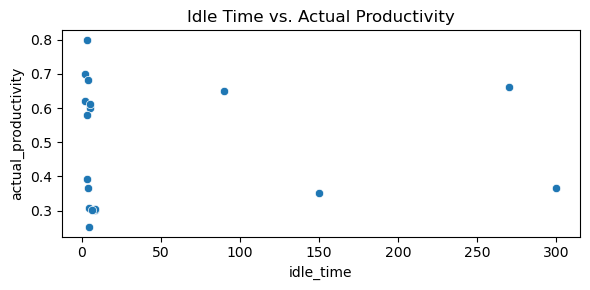

In [108]:
non_zero_idle = df[df['idle_time'] != 0]
plt.figure(figsize=(6,3))
sns.scatterplot(x = 'idle_time', y ='actual_productivity', data = non_zero_idle)
plt.title('Idle Time vs. Actual Productivity')
plt.tight_layout()
plt.show()

In [109]:
len(df[df['idle_time'] > 0])

18

The company does not have a lot of idle time. Idle time won't be a problem for productivity in this period.

In [110]:
df['idle_men'].sum()

442

In [111]:
df.groupby('department')['team'].sum()

department
finishing    3187
sweing       4506
Name: team, dtype: int64

In [112]:
df['day'].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

It seems like there is no information on Friday; maybe the company is closed on Fridays.

In [113]:
correlation = df['incentive'].corr(df['actual_productivity'])
print(f"Correlation between incentive and actual productivity: {correlation}")

Correlation between incentive and actual productivity: 0.07653762727386508


In [114]:
df.groupby(['quarter'])['actual_productivity'].sum()

quarter
Quarter1    270.561521
Quarter2    249.142761
Quarter3    147.999310
Quarter4    175.848647
Quarter5     36.351805
Name: actual_productivity, dtype: float64

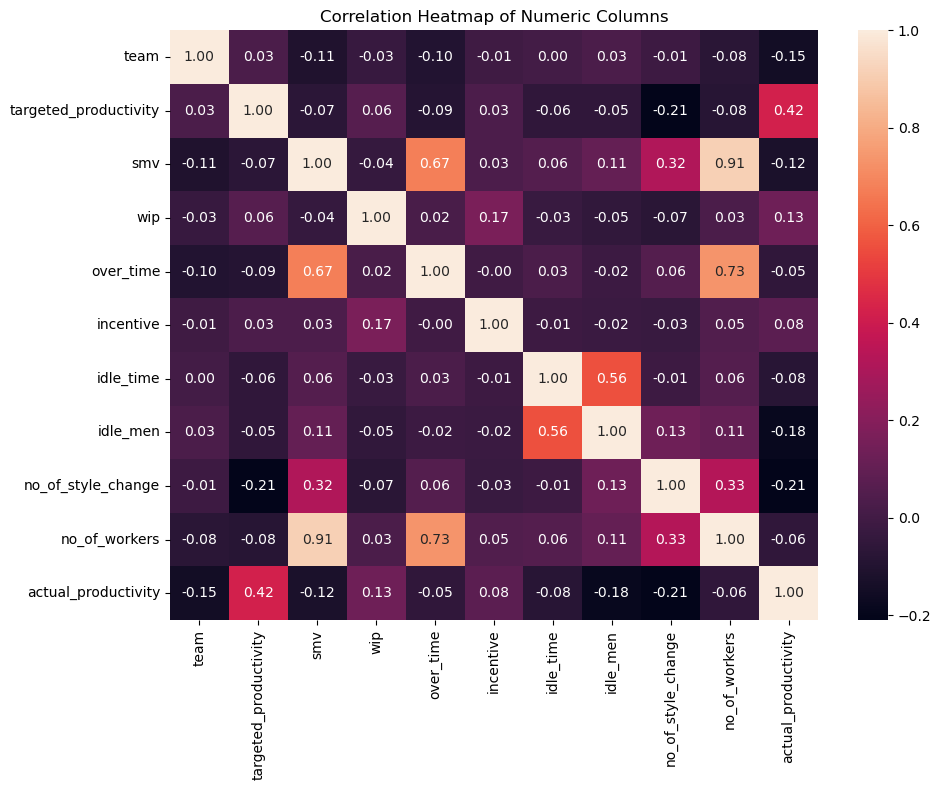

In [115]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

In [116]:
df['no_of_style_change'].value_counts()

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64

We know the 'wip' column has null values. Below, we inspect the 'wip' column for null values and check if there are any 'idle_men' or 'idle_time' entries when 'wip' is null.

In [148]:
df['wip'].isnull().sum()

506

In [137]:
df[df['wip'].isnull()]['idle_time'].value_counts()

idle_time
0.0    506
Name: count, dtype: int64

In [135]:
df[df['wip'].isnull()]['idle_men'].value_counts()

idle_men
0    506
Name: count, dtype: int64

In [136]:
df[df['wip'].isnull()]['department'].value_counts()

department
finishing    506
Name: count, dtype: int64

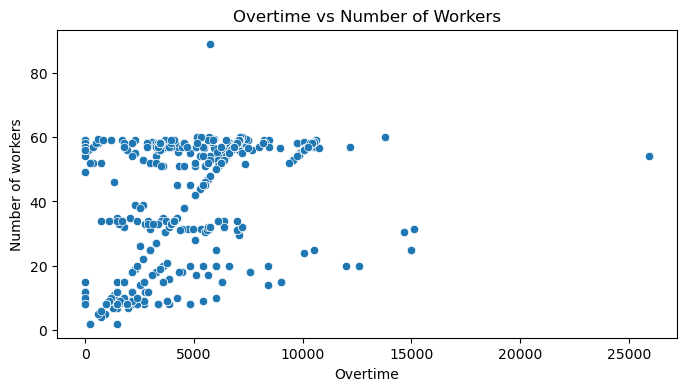

In [117]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='over_time', y='no_of_workers')
plt.title('Overtime vs Number of Workers')
plt.xlabel('Overtime')
plt.ylabel('Number of workers')
plt.show()

<Axes: xlabel='smv', ylabel='actual_productivity'>

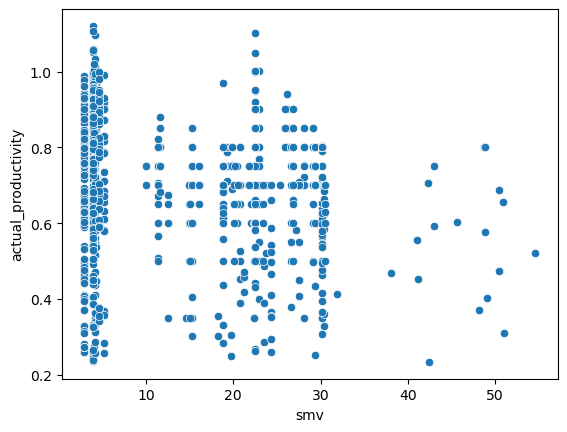

In [118]:
sns.scatterplot(y = 'actual_productivity', x = 'smv', data =df)